<a href="https://colab.research.google.com/github/kocsis-david/QCNNeval/blob/main/qcnn_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq==1.3.0
!pip install tensorflow==2.15.0
!pip install tensorflow-quantum==0.7.3
!pip install matplotlib
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
import numpy as np
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

random_seed=43
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

170498071/170498071 [==============================] - 8s 0us/step


In [4]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
reduced_data=x_train[:1000]
reduced_labels=y_train[:1000]
x_train = reduced_data
y_train = reduced_labels
x_test = x_test[:200]
y_test = y_test[:200]

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocessing: Select a subset and normalize pixel values
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test)).flatten()

# Convert labels to binary (e.g., 0 vs 1 for simplification, you can adapt it for other class pairs)
# In this example, we'll try to distinguish between class 0 (airplane) and class 1 (automobile)
binary_mask = np.isin(y, [0, 1])
x = x[binary_mask]
y = y[binary_mask]

# Normalize images
x = x.astype(np.float32) / 255.0
x = x.reshape(x.shape[0], -1)  # Flatten images

# Select 1000 training images and 200 test images
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=1000, test_size=200, random_state=42)

# Classical NN for comparison
blob_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
blob_nn.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=3e-3), metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

c_history = blob_nn.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[callback])




Epoch 1/50
32/32 [==============================] - 1s 16ms/step - loss: 0.7846 - accuracy: 0.6130 - val_loss: 0.5103 - val_accuracy: 0.7350
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4690 - accuracy: 0.7670 - val_loss: 0.5963 - val_accuracy: 0.7150
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 0.4551 - accuracy: 0.7790 - val_loss: 0.4905 - val_accuracy: 0.7800
Epoch 4/50
32/32 [==============================] - 0s 10ms/step - loss: 0.4682 - accuracy: 0.7690 - val_loss: 0.5064 - val_accuracy: 0.7700
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.3993 - accuracy: 0.8170 - val_loss: 0.4902 - val_accuracy: 0.8000
Epoch 6/50
32/32 [==============================] - 0s 10ms/step - loss: 0.4510 - accuracy: 0.7790 - val_loss: 0.5266 - val_accuracy: 0.7600
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 0.4415 - accuracy: 0.7900 - val_loss: 0.4791 - val_accuracy: 0.7950
Epoch 8/50
32/32

(0, 0): ───@───Ry(q0)───Rz(q1)────────────────────────────────────────────────────────────────────────────────X───@───Ry(q20)───Rz(q21)───────────────────────────────────────────────────────────────────────────────────X───@───Ry(q40)───Rz(q41)───────────────────────────────────────────────────────────────────────────────────X───
           │                                                                                                  │   │                                                                                                       │   │                                                                                                       │
(0, 1): ───X───@────────Ry(q2)───Rz(q3)───────────────────────────────────────────────────────────────────────┼───X───@─────────Ry(q22)───Rz(q23)─────────────────────────────────────────────────────────────────────────┼───X───@─────────Ry(q42)───Rz(q43)─────────────────────────────────────────────────────────────────────────┼───
          

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


300/300 [==============================] - 47s 155ms/step - loss: 1.2402 - accuracy: 0.5021 - val_loss: 0.9145 - val_accuracy: 0.4917
Epoch 2/50
300/300 [==============================] - 48s 159ms/step - loss: 0.8741 - accuracy: 0.5021 - val_loss: 0.8538 - val_accuracy: 0.4921
Epoch 3/50
300/300 [==============================] - 47s 156ms/step - loss: 0.8101 - accuracy: 0.5345 - val_loss: 0.8132 - val_accuracy: 0.5325
Epoch 4/50
300/300 [==============================] - 44s 147ms/step - loss: 0.7972 - accuracy: 0.5390 - val_loss: 0.8051 - val_accuracy: 0.5396
Epoch 5/50
300/300 [==============================] - 45s 149ms/step - loss: 0.7922 - accuracy: 0.5424 - val_loss: 0.7990 - val_accuracy: 0.5437
Epoch 6/50
300/300 [==============================] - 44s 148ms/step - loss: 0.7905 - accuracy: 0.5455 - val_loss: 0.7986 - val_accuracy: 0.5433
Epoch 7/50
300/300 [==============================] - 45s 151ms/step - loss: 0.7872 - accuracy: 0.5452 - val_loss: 0.8000 - val_accuracy: 0.5

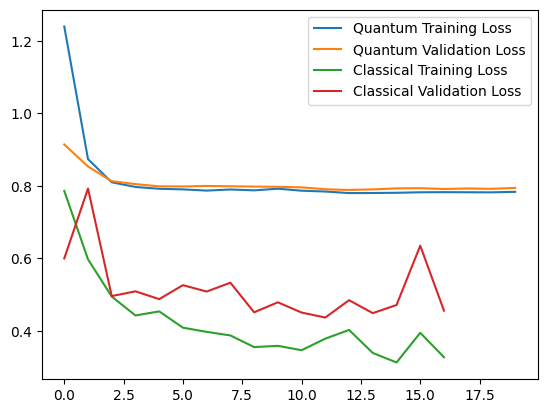

<Figure size 640x480 with 0 Axes>

In [ ]:
# Quantum NN
def convert_data(data, qubits, test=False):
    cs = []
    for i in data:
        cir = cirq.Circuit()
        for j in range(len(qubits)):
            cir += cirq.rx(i[j] * np.pi).on(qubits[j])
            cir += cirq.ry(i[j] * np.pi).on(qubits[j])
        cs.append(cir)
    if test:
        return tfq.convert_to_tensor([cs])
    return tfq.convert_to_tensor(cs)

def encode(data, labels, qubits):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=43)
    return convert_data(X_train, qubits), convert_data(X_test, qubits), y_train, y_test

def layer(circuit, qubits, params):
    for i in range(len(qubits)):
        if i + 1 < len(qubits):
            circuit += cirq.CNOT(qubits[i], qubits[i + 1])
        circuit += cirq.ry(params[i * 2]).on(qubits[i])
        circuit += cirq.rz(params[i * 2 + 1]).on(qubits[i])
    circuit += cirq.CNOT(qubits[-1], qubits[0])
    return circuit

def model_circuit(qubits, depth):
    cir = cirq.Circuit()
    num_params = depth * 2 * len(qubits)
    params = sympy.symbols("q0:%d"%num_params)
    for i in range(depth):
        cir = layer(cir, qubits, params[i * 2 * len(qubits):i * 2 * len(qubits) + 2 * len(qubits)])
    return cir

qs = [cirq.GridQubit(0, i) for i in range(10)]  # Using 10 qubits (can be adjusted)
d = 3
X_train, X_test, y_train, y_test = encode(x, y, qs)
c = model_circuit(qs, d)
print(c)

readout_operators = [cirq.Z(qs[0])]
inputs = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
#layer1 = tfq.layers.PQC(c, readout_operators, repetitions=32, differentiator=tfq.differentiators.ParameterShift())(inputs)
layer1 = tfq.layers.PQC(c, readout_operators, differentiator=tfq.differentiators.Adjoint())(inputs)

vqc = tf.keras.models.Model(inputs=inputs, outputs=layer1)
vqc.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.03), metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

v_history = vqc.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[callback])

# Plot training histories
plt.plot(v_history.history['loss'], label='Quantum Training Loss')
plt.plot(v_history.history['val_loss'], label='Quantum Validation Loss')
plt.plot(c_history.history['loss'], label='Classical Training Loss')
plt.plot(c_history.history['val_loss'], label='Classical Validation Loss')
plt.legend()
plt.show()
plt.savefig("cifar10_classical_vs_quantum")

In [6]:


import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ... (Previous code for data loading and preprocessing) ...

def convert_data(data, qubits, test=False):
    cs = []
    for i in data:
        cir = cirq.Circuit()
        for j in range(len(qubits)):
            cir += cirq.rx(i[j] * np.pi).on(qubits[j])
            cir += cirq.ry(i[j] * np.pi).on(qubits[j])
        cs.append(cir)
    if test:
        return tfq.convert_to_tensor([cs])
    return tfq.convert_to_tensor(cs)

def encode(data, labels, qubits):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=43)
    return convert_data(X_train, qubits), convert_data(X_test, qubits), y_train, y_test

def layer(circuit, qubits, params):
    for i in range(len(qubits)):
        if i + 1 < len(qubits):
            circuit += cirq.CNOT(qubits[i], qubits[i + 1])
        circuit += cirq.ry(params[i * 2]).on(qubits[i])
        circuit += cirq.rz(params[i * 2 + 1]).on(qubits[i])
    circuit += cirq.CNOT(qubits[-1], qubits[0])
    return circuit

def model_circuit(qubits, depth):
    cir = cirq.Circuit()
    num_params = depth * 2 * len(qubits)
    params = sympy.symbols("q0:%d"%num_params)
    for i in range(depth):
        cir = layer(cir, qubits, params[i * 2 * len(qubits):i * 2 * len(qubits) + 2 * len(qubits)])
    return cir

# Improved Quantum Model
qs = [cirq.GridQubit(3, i) for i in range(12)]  # Increased number of qubits
d = 4  # Increased depth
X_train, X_test, y_train, y_test = encode(x, y, qs)
c = model_circuit(qs, d)

readout_operators = [cirq.Z(qs[0])]


In [8]:

inputs = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
# Use a more sophisticated differentiator (e.g., Adjoint)
layer1 = tfq.layers.PQC(c, readout_operators, differentiator=tfq.differentiators.Adjoint())(inputs)

vqc = tf.keras.models.Model(inputs=inputs, outputs=layer1)
vqc.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

v_history = vqc.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])



/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/20
300/300 [==============================] - 97s 314ms/step - loss: 0.8388 - accuracy: 0.5623 - val_loss: 0.6557 - val_accuracy: 0.6021
Epoch 2/20
300/300 [==============================] - 95s 315ms/step - loss: 0.6386 - accuracy: 0.6444 - val_loss: 0.6127 - val_accuracy: 0.6733
Epoch 3/20
300/300 [==============================] - 96s 322ms/step - loss: 0.6258 - accuracy: 0.6594 - val_loss: 0.6296 - val_accuracy: 0.6554
Epoch 4/20
300/300 [==============================] - 91s 302ms/step - loss: 0.6318 - accuracy: 0.6498 - val_loss: 0.6275 - val_accuracy: 0.6625
Epoch 5/20
300/300 [==============================] - 96s 319ms/step - loss: 0.6255 - accuracy: 0.6556 - val_loss: 0.6367 - val_accuracy: 0.6767
Epoch 6/20
300/300 [==============================] - 95s 316ms/step - loss: 0.6340 - accuracy: 0.6439 - val_loss: 0.6298 - val_accuracy: 0.6542
Epoch 7/20
300/300 [==============================] - 112s 374ms/step - loss: 0.6402 - accuracy: 0.6426 - val_loss: 0.6856 - val_a

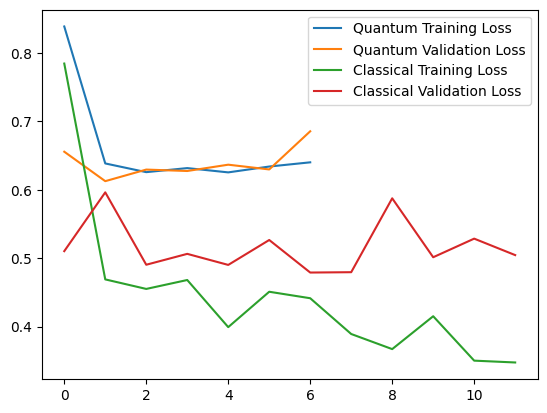

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot training histories
plt.plot(v_history.history['loss'], label='Quantum Training Loss')
plt.plot(v_history.history['val_loss'], label='Quantum Validation Loss')
plt.plot(c_history.history['loss'], label='Classical Training Loss')
plt.plot(c_history.history['val_loss'], label='Classical Validation Loss')
plt.legend()
plt.show()
plt.savefig("cifar10_classical_vs_quantum_improved")

In [10]:
test_acc = vqc.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

75/75 [==============================] - 8s 105ms/step - loss: 0.6856 - accuracy: 0.6708
Test accuracy: [0.685575008392334, 0.6708333492279053]


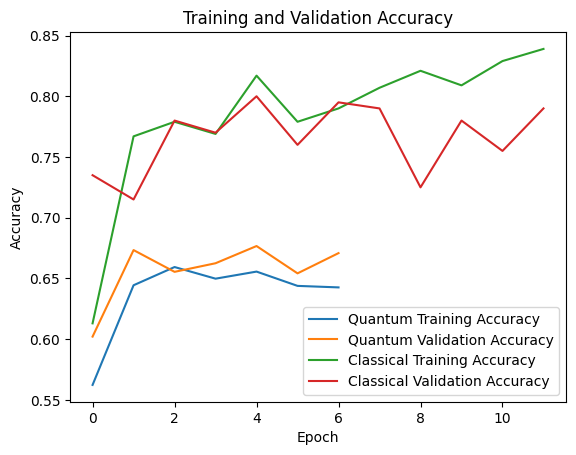

In [11]:
# prompt: Show test diagram

import matplotlib.pyplot as plt
plt.plot(v_history.history['accuracy'], label='Quantum Training Accuracy')
plt.plot(v_history.history['val_accuracy'], label='Quantum Validation Accuracy')
plt.plot(c_history.history['accuracy'], label='Classical Training Accuracy')
plt.plot(c_history.history['val_accuracy'], label='Classical Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
